In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
%matplotlib inline

In [30]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [31]:
x = df.iloc[:,:-1]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [32]:
y = df.iloc[:,-1]
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [33]:
# check for null values

x.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [34]:
# split the dataset

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8)

In [35]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16675,-122.79,40.75,17.0,3851.0,818.0,1352.0,560.0,2.1250
2727,-117.69,33.62,18.0,4265.0,581.0,2025.0,544.0,6.4598
2099,-117.34,33.16,24.0,1006.0,277.0,610.0,246.0,2.2500
2540,-117.64,33.68,4.0,5687.0,970.0,2677.0,938.0,6.5069
4754,-118.08,33.84,31.0,2377.0,600.0,2042.0,593.0,3.6250
...,...,...,...,...,...,...,...,...
12135,-121.44,38.51,27.0,7212.0,1606.0,4828.0,1549.0,2.2140
6805,-118.30,34.08,34.0,2501.0,1047.0,3326.0,970.0,1.8771
146,-116.18,33.69,17.0,89.0,19.0,79.0,21.0,2.3750
16218,-122.48,37.77,52.0,2556.0,595.0,1202.0,568.0,3.8899


In [36]:
x_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Feature Scaling - Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()
x_train=x_train.mask(x_train.eq('None')).dropna()
x_test=x_test.mask(x_test.eq('None')).dropna()
x_train_copy = scale.fit_transform(x_train)
x_test_copy = scale.fit_transform(x_test)

In [39]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16675,-122.79,40.75,17.0,3851.0,818.0,1352.0,560.0,2.1250
2727,-117.69,33.62,18.0,4265.0,581.0,2025.0,544.0,6.4598
2099,-117.34,33.16,24.0,1006.0,277.0,610.0,246.0,2.2500
2540,-117.64,33.68,4.0,5687.0,970.0,2677.0,938.0,6.5069
4754,-118.08,33.84,31.0,2377.0,600.0,2042.0,593.0,3.6250


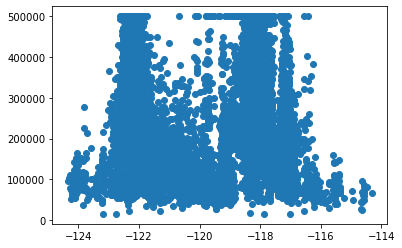

In [40]:
plt.scatter(x_train['longitude'],y_train)

# Lets train our model

1) Linear Regression 

In [41]:
from sklearn.linear_model import LinearRegression
regLinear = LinearRegression()

regLinear.fit(x_train,y_train)
ScoreLinear = regLinear.score(x_test,y_test)
ScoreLinear

0.6300630935878971

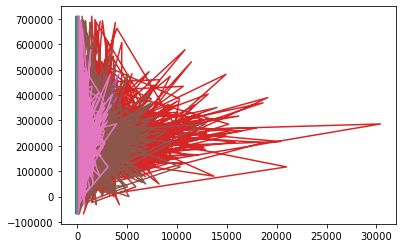

In [42]:
y_pred = regLinear.predict(x_test)
plt.plot(x_test,y_pred)

In [43]:
# Defining a function that prints out all the metrics
def metrics(y_true,y_pred):
    print(f'MAE: ',mean_absolute_error(y_true,y_pred))
    print(f'MSE: ',mean_squared_error(y_true,y_pred))
    print(f'RMSE: ',mean_squared_error(y_true,y_pred)**0.5)
    print(f'Explained Variance Score: ',explained_variance_score(y_true,y_pred))

# function for calculating the accuracy
def accuracy(y_true,y_predictions):
    errors = abs(y_predictions - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy_model = 100 - mape
    return accuracy_model

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [45]:
metrics(y_test,y_pred)

MAE:  50677.44244704148
MSE:  4910564175.750733
RMSE:  70075.41777078988
Explained Variance Score:  0.6300731839600097


In [46]:
accuracy(y_test,y_pred)

70.7713063641573

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
regDTree = DecisionTreeRegressor(random_state=0)
regDTree.fit(x_train,y_train)
ScoreDTree = regDTree.score(x_test,y_test)
ScoreDTree

0.6159822076474825

In [50]:
y_pred_DTree = regDTree.predict(x_test)
y_pred_DTree

array([ 53400., 444300., 177900., ...,  67000., 148700., 225000.])

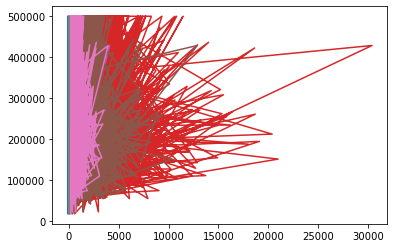

In [51]:
plt.plot(x_test,y_pred_DTree)

In [52]:
metrics(y_test,y_pred_DTree)

MAE:  45962.95911764706
MSE:  5097474680.929706
RMSE:  71396.60132618152
Explained Variance Score:  0.6161732610031465


In [53]:
accuracy(y_test,y_pred_DTree)

75.89469305631224

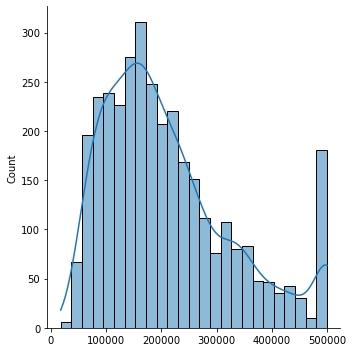

In [58]:
sns.displot(y_pred_DTree,kde=True)

# Random Forest 

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regRF = RandomForestRegressor(n_estimators=100,random_state=0)
regRF.fit(x_train,y_train)
ScoreRF = regRF.score(x_test,y_test)
ScoreRF

0.8090255242641767

In [62]:
y_pred_RF = regRF.predict(x_test)
y_pred_RF

array([ 55927.  , 301901.05, 218814.  , ...,  86311.  , 148698.  ,
       217482.  ])

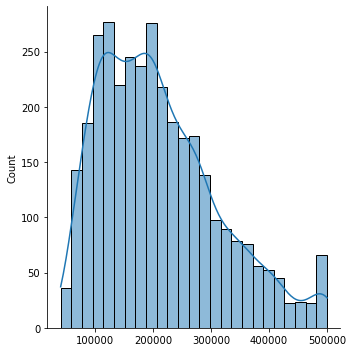

In [63]:
sns.displot(y_pred_RF,kde=True)

In [64]:
metrics(y_test,y_pred_RF)

MAE:  33333.10495
MSE:  2535006382.9166265
RMSE:  50348.84688765599
Explained Variance Score:  0.8092098075202094


In [65]:
accuracy(y_test,y_pred_RF)

82.22495344124765

# KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
regKNN = KNeighborsRegressor()
regKNN.fit(x_train,y_train)
ScoreKNN = regKNN.score(x_test,y_test)
ScoreKNN

0.2507781649285221

In [69]:
y_pred_KNN = regKNN.predict(x_test)
y_pred_KNN

array([106560., 193040., 148860., ..., 182980., 169720., 128980.])

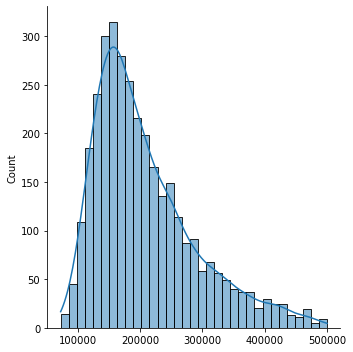

In [70]:
sns.displot(y_pred_KNN,kde=True)

In [71]:
metrics(y_test,y_pred_KNN)

MAE:  77591.59047058824
MSE:  9945214546.649672
RMSE:  99725.6965212561
Explained Variance Score:  0.25083152321749747


In [72]:
accuracy(y_test,y_pred_KNN)

50.748006865469875

# SVM

In [73]:
from sklearn.svm import SVR

In [75]:
regSVM = SVR(kernel='rbf')
regSVM.fit(x_train,y_train)
ScoreSVM = regSVM.score(x_test,y_test)
ScoreSVM

-0.06376020705948093

In [76]:
y_pred_SVM = regSVM.predict(x_test)
y_pred_SVM

array([179296.11106658, 179526.05852577, 179455.26721956, ...,
       179230.38804756, 180023.34005638, 179179.64239988])

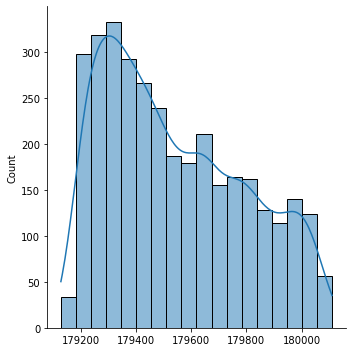

In [77]:
sns.displot(y_pred_SVM,kde=True)

In [78]:
metrics(y_test,y_pred_SVM)

MAE:  88269.20715115889
MSE:  14120415329.841154
RMSE:  118829.35382236644
Explained Variance Score:  0.001032715803133688


In [79]:
accuracy(y_test,y_pred_SVM)

49.28492539861294